In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import plotly.express as px
from itertools import product
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
datasets = ['Crossed barrel_dataset.csv', 'double_perovskites_gap.csv', 'concrete_mod.csv'] # delete datasets you won't use
n_features = [3, 8, 20]
acq_func = [0.01, 1, 1.5]
model = ['Linear', 'RF']

In [3]:
hyperparameter_combinations = list(product(datasets, n_features, acq_func, model)) # find all combination of hyperparameters

# put combos into dictionary for easier searching
all_combos = []
for combo in hyperparameter_combinations:
    all_combos.append({
        'dataset': combo[0],
        'n_features': combo[1],
        'acq_func': combo[2],
        'model': combo[3]
    })

In [4]:
n = 5
combo = all_combos[n]

# #Output to CSV  
output_name = f"{combo['dataset'].split('.')[0]}_{combo['n_features']}_{combo['acq_func']}_{combo['model']}"
output_name

'concrete_mod_3_1.5_RF'

In [5]:
df = pd.read_csv(output_name+".csv")
df

,Unnamed: 0,Seed 1,Seed 2,Seed 3,Seed 4,Seed 5,Mean,Std Dev,Learning Cycle
0,0,0,0,0,0,0,0.0,0.000000,0
1,1,0,0,0,0,0,0.0,0.000000,1
2,2,0,0,0,1,0,0.2,0.447214,2
3,3,0,0,0,1,0,0.2,0.447214,3
4,4,0,0,0,1,1,0.4,0.547723,4
...,...,...,...,...,...,...,...,...,...
291,291,13,13,13,13,13,13.0,0.000000,291
292,292,13,13,13,13,13,13.0,0.000000,292
293,293,13,13,13,13,13,13.0,0.000000,293
294,294,14,14,14,14,14,14.0,0.000000,294


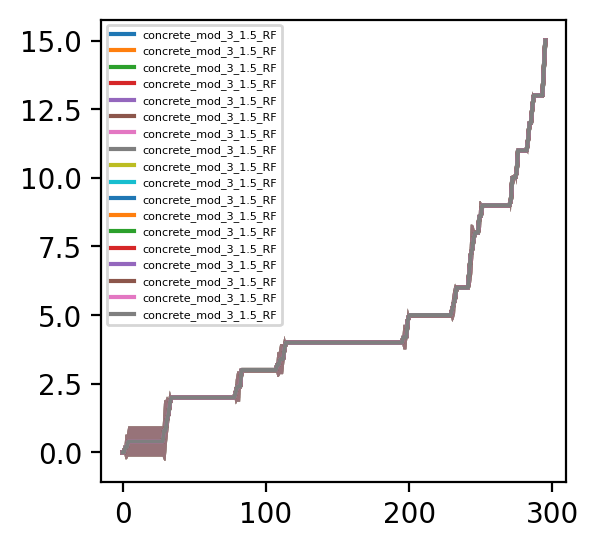

In [6]:
plt.figure(figsize=(3,3),dpi=200)

for n in range(len(all_combos)):
    output_name = f"{combo['dataset'].split('.')[0]}_{combo['n_features']}_{combo['acq_func']}_{combo['model']}"
    df = pd.read_csv(output_name+".csv")

    plt.plot(df.index, df["Mean"], label=output_name)
    plt.fill_between(df.index, df["Mean"] - df["Std Dev"], df["Mean"] + df["Std Dev"], alpha=0.2)

plt.legend(fontsize=4)

In [22]:
df_rand = pd.read_csv("random_search_out.csv").T
df_rand["Mean"] = df_rand.iloc[:,:5].mean(axis=1)
df_rand["Std Dev"] = df_rand.iloc[:,:5].std(axis=1)
df_rand.reset_index(inplace=True)
#df_rand.index = np.arange(0, len(df_rand)) - 10
df_rand

,index,0,1,2,3,4,Mean,Std Dev
0,Unnamed: 0,0,1,2,3,4,2.0,1.581139
1,0,1,0,0,0,0,0.2,0.447214
2,1,1,0,0,0,0,0.2,0.447214
3,2,1,0,0,0,0,0.2,0.447214
4,3,1,0,1,0,0,0.4,0.547723
...,...,...,...,...,...,...,...,...
296,295,15,15,15,15,15,15.0,0.000000
297,296,15,15,15,15,15,15.0,0.000000
298,297,15,15,15,15,15,15.0,0.000000
299,298,15,15,15,15,15,15.0,0.000000


In [23]:
import plotly.io as pio
pio.renderers.default = 'notebook'

In [27]:
# loop through indices, and plot traces using plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_rand.index[10:], y=df_rand.iloc[10:,:]["Mean"], mode = "lines", name="Random Search",
    line=dict(color='black', width=4)))

for n in range(len(all_combos)):
    combo = all_combos[n]
    output_name = f"{combo['dataset'].split('.')[0]}_{combo['n_features']}_{combo['acq_func']}_{combo['model']}"
    shortname = f"{n}: {combo['n_features']}_{combo['acq_func']}_{combo['model']}"
    df = pd.read_csv(output_name+".csv")

    # plt.plot(df.index, df["Mean"], label=output_name)
    # plt.fill_between(df.index, df["Mean"] - df["Std Dev"], df["Mean"] + df["Std Dev"], alpha=0.2)
    # plt.legend(fontsize=4)

    fig.add_trace(go.Scatter(x=df.index, y=df["Mean"], 
                                name=shortname))

# add plotly express legend
# show plotly plot
fig.show()